<a href="https://colab.research.google.com/github/simsekergun/ENEE691/blob/main/week06/BinaryLogisticRegressionExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the functions/methods 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc   
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [ ]:
ds = "https://raw.githubusercontent.com/simsekergun/ENEE691/main/week06/regression_data.csv"
df = pd.read_csv(ds)
df.sample(10)

,0.957,0.656,0.277,1.348,1.1969,1.1969.1,0.37416,1.1969.2,1.1969.3,0
708,1.000,0.983,0.8915,0.80842,1.33300,0.10000,1.4385,1.33300,0.10000,1
942,1.000,0.986,0.8860,0.80501,1.33800,0.10000,1.4541,1.33800,0.10000,1
607,1.000,0.374,0.4395,0.10000,0.56389,0.79897,1.6276,0.56389,0.79897,0
734,0.968,0.950,0.6360,0.87597,1.36010,0.25534,2.3304,1.36010,0.25534,0
336,1.000,0.055,1.0000,2.10000,0.36951,0.10000,0.1000,0.36951,0.10000,0
941,1.000,0.989,0.8715,0.80243,1.33550,0.10000,1.4802,1.33550,0.10000,0
871,1.000,0.989,0.8730,0.80243,1.33550,0.10000,1.4802,1.33550,0.10000,0
946,0.072,0.691,0.8220,0.47475,4.43040,0.47475,1.5997,4.43040,0.47475,0
732,1.000,0.993,0.8550,0.78753,1.26730,0.10000,1.4560,1.26730,0.10000,0
337,0.880,0.063,0.8565,1.97560,1.10430,0.10000,0.1000,1.10430,0.10000,0


In [ ]:
df.shape

(1046, 10)

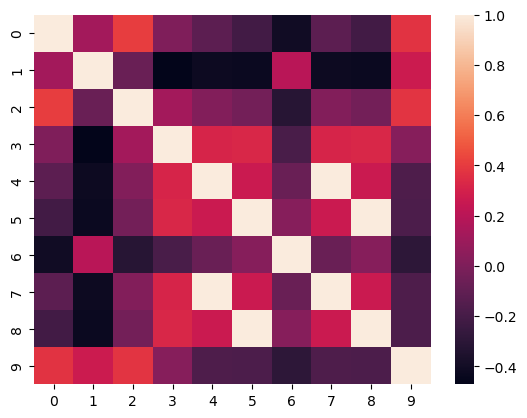

In [ ]:
cm = np.corrcoef(df.values.T)     # Calculate Pearson correlation
hm = sns.heatmap((cm))
plt.show()

In [ ]:
X = df[df.columns[0:8]].to_numpy()    # features (independent variables)
y = df[df.columns[9]].to_numpy()      # target (dependent variable)

In [ ]:
# Dividing the features and the target variable into the train and test subsets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14, stratify=y)

In [ ]:
# Checking the distribution of the train and test categories for the target variable 
print(np.bincount(y))
print(np.bincount(y_train))
print(np.bincount(y_test))

[669 377]
[468 264]
[201 113]


Unfortunately, this is not a well-balanced dataset. Number of 0's (669) is much larger than number of 1's (377). We'll learn with how to deal this with these kinds of datasets later. For the moment, just forget about the potential issues and proceed

In [ ]:
logreg = LogisticRegression(penalty = 'none', max_iter = 1000) # Instantiating logistic regression 
logreg.fit(X_train, y_train)  # Fitting the train data to 'logreg'

LogisticRegression(max_iter=1000, penalty='none')

Note that we could define a penalty factor similar to what we did last week (regularization), but that' not the focus of today's lecture.

In [ ]:
# Predicted class for the test subset through logistic regression 

y_train_pred_prob = logreg.predict_proba(X_train)  # Calculating probabilities of the two classes in train subset
y_test_pred_prob = logreg.predict_proba(X_test)    # Calculating probabilities of the two classes in test subset

# Presenting the probabilities for the 1st 5 instances in train subset
print('Train predictions for probabilities:\n\n', y_train_pred_prob[:5],'\n')

# Presenting the probabilities for the 1st 5 instances in test subset
print('Test predictions for probabilities:\n\n', y_test_pred_prob[:5])

Train predictions for probabilities:

 [[4.22056620e-003 9.95779434e-001]
 [2.04104179e-001 7.95895821e-001]
 [1.00000000e+000 5.52134679e-091]
 [1.00000000e+000 2.53002483e-169]
 [1.00000000e+000 2.72813146e-075]] 

Test predictions for probabilities:

 [[1.00000000e+00 9.02586745e-44]
 [1.53345912e-01 8.46654088e-01]
 [9.79753401e-01 2.02465985e-02]
 [1.52205057e-01 8.47794943e-01]
 [1.00000000e+00 0.00000000e+00]]


In [ ]:
y_train_pred = y_train_pred_prob.argmax(axis=1)  # Finding the predicted class for train predictions
y_test_pred = y_test_pred_prob.argmax(axis=1)  # Finding the predicted class for test predictions

# Presenting the predicted classes for the 1st 10 instances of train
print('Predicted class for train: ', y_train_pred[:10],'\n')     

# Presenting the predicted classes for the last 10 instances of test
print('Predicted class for train: ', y_test_pred[-10:])

Predicted class for train:  [1 1 0 0 0 0 0 0 0 0] 

Predicted class for train:  [1 1 1 1 0 0 0 0 0 0]


In [ ]:
# Calculating the train and test accuracy scores of the model
train_score = accuracy_score(y_train, y_train_pred) # train accuracy
test_score = accuracy_score(y_test, y_test_pred)    # test accuracy

print('Train accuracy score of the model is ', round(train_score, 5),'\n')
print('Test accuracy score of the model is ', round(test_score, 5))

Train accuracy score of the model is  0.90984 

Test accuracy score of the model is  0.91083


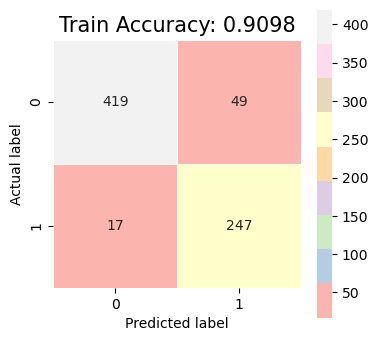

Classification Report for the Train Subset: 

               precision    recall  f1-score   support

           0       0.96      0.90      0.93       468
           1       0.83      0.94      0.88       264

    accuracy                           0.91       732
   macro avg       0.90      0.92      0.90       732
weighted avg       0.92      0.91      0.91       732



In [ ]:
# Computing the confusion matrix for the train subset
train_c_matrix = confusion_matrix(y_train, y_train_pred)  # Compute the train confusion matrix

plt.figure(figsize=(4,4))
sns.heatmap(train_c_matrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Train Accuracy: {0}'.format(round(train_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

# Print the train classification report

print('Classification Report for the Train Subset: \n\n', classification_report(y_train, y_train_pred))

Above, in the last column, support is the number of samples of the true response that lie in that class. 

Note that our F1[p] is lower than F1[n], as expected.

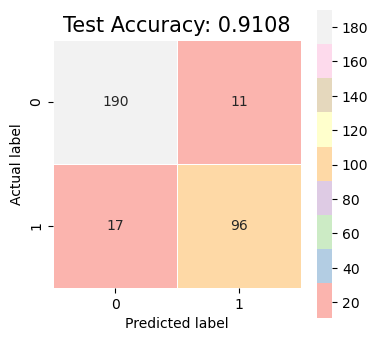

Classification Report for the Test Subset: 

               precision    recall  f1-score   support

           0       0.92      0.95      0.93       201
           1       0.90      0.85      0.87       113

    accuracy                           0.91       314
   macro avg       0.91      0.90      0.90       314
weighted avg       0.91      0.91      0.91       314



In [ ]:
# Computing the confusion matrix for the test subset

test_c_matrix = confusion_matrix(y_test, y_test_pred)  # Compute the test confusion matrix

plt.figure(figsize=(4,4))
sns.heatmap(test_c_matrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Accuracy: {0}'.format(round(test_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

# Print the train classification report

print('Classification Report for the Test Subset: \n\n', classification_report(y_test, y_test_pred))

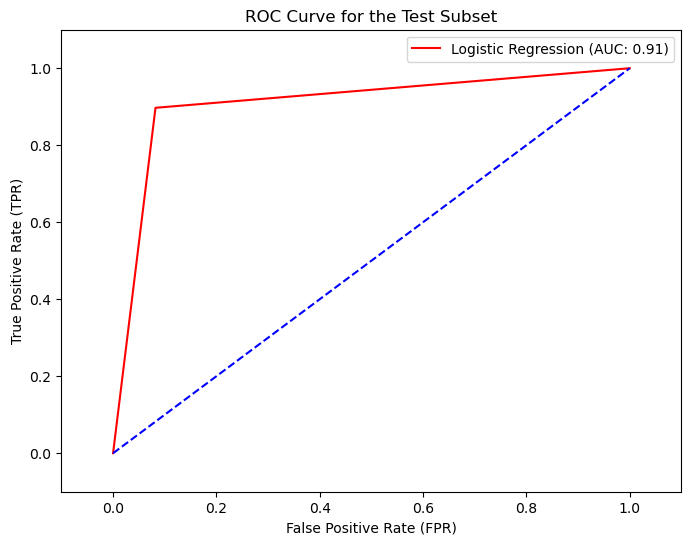

In [ ]:
# Plotting the ROC curve for the test subset
fpr, tpr, thresholds = roc_curve(y_test_pred, y_test)  # Computing ROC for the test subset
auc(fpr, tpr)                                          # Computing AUC for the test subset 

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', label='Logistic Regression (AUC: %.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.title('ROC Curve for the Test Subset')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()